#### `Refraction` with wave optics

We can use wave optics to explore refraction, here, we assume incident and refracted waves are all plane waves......

In [ ]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, Ellipse, Circle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
np.random.seed(42)
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
plt.style.use('dark_background')

theta_1: 39.81
theta_2: 73.80


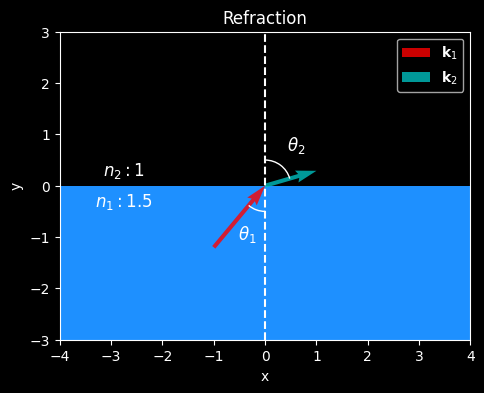

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
rect = Rectangle((-4, -3), 8, 3, linewidth=1, edgecolor='none', facecolor='dodgerblue')
ax.add_patch(rect)

ax.plot([0,0], [-3, 3], 'w--')

n_1=1.5
n_2=1

ax.text(-2.75, 0.3, f'$n_2: {n_2}$', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax.text(-2.75, -0.3, f'$n_1: {n_1}$', horizontalalignment='center', verticalalignment='center', fontsize=12)

k1x = 1
k1y = 1.2
ax.quiver(-k1x, -k1y, k1x, k1y, angles='xy', scale_units='xy', scale=1, color='r', width=0.01, alpha=0.8, label='$\mathbf{k}_1$')

theta_1 = np.arctan2(k1x, k1y)
theta_2 = np.arcsin(n_1*np.sin(theta_1)/n_2)
print(f'theta_1: {np.rad2deg(theta_1):.2f}')
print(f'theta_2: {np.rad2deg(theta_2):.2f}')

k2 = np.sqrt(k1x**2 + k1y**2)*np.sin(theta_1)/np.sin(theta_2)
k2x = k2*np.sin(theta_2)
k2y = k2*np.cos(theta_2)
ax.quiver(0, 0, k2x, k2y, angles='xy', scale_units='xy', scale=1, color='c', width=0.01, alpha=0.8, label='$\mathbf{k}_2$')

angle_arc_1 = Arc([0,0], 1, 1, theta1=-90-np.rad2deg(theta_1), theta2=-90, color='w')
angle_arc_2 = Arc([0,0], 1, 1, theta1=90-np.rad2deg(theta_2), theta2=90, color='w')
ax.add_patch(angle_arc_1)
ax.add_patch(angle_arc_2)
ax.text(-1*np.sin(theta_1/2), -1*np.cos(theta_1/2), r'$\theta_1$', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax.text(1*np.sin(theta_2/2), 1*np.cos(theta_2/2), r'$\theta_2$', horizontalalignment='center', verticalalignment='center', fontsize=12)


ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Refraction')
ax.legend()

# ax.grid(True)
# ax.axis('off')
plt.show()

Using wave optics, we can write the plane wave in $n_1$ as

$$e^{i(k_{x,1}x+k_{y,1}y)}=e^{i\frac{2\pi}{\lambda_1}(\sin{\theta_1}x+\cos{\theta_1}y)}$$

where wave number

$$\mathbf{k_1}=\begin{bmatrix} k_{x,1} \\ k_{y,1} \end{bmatrix}$$

Similarly, we can write the plane wave in $n_2$ as

$$e^{i(k_{x,2}x+k_{y,2}x)}=e^{i\frac{2\pi}{\lambda_2}(\sin{\theta_2}x+\cos{\theta_2}y)}$$

where wave number

$$\mathbf{k_2}=\begin{bmatrix} k_{x,2} \\ k_{y,2} \end{bmatrix}$$

At the interface $y=0$, the `phase` of each point on the interface must be the same before/after refraction (this ensures wavefronts are continuous), or

$$\frac{2\pi}{\lambda_1}(\sin{\theta_1}x)=\frac{2\pi}{\lambda_2}(\sin{\theta_2}x)$$

Using wavelength of vacuum $\lambda$, and refractive indices $n_1, n_2$, we have

$$\boxed{\frac{n_1}{\lambda}\,\sin{\theta_1}=\frac{n_2}{\lambda}\,\sin{\theta_2}}$$

which is `Snell's law`

#### `Evanescent` field

From previous, we know at interface, phase must be the same before/after refraction

$$k_{x, 1}=k_{x, 2}=\frac{2\pi}{\lambda_2}\sin(\theta_2)$$

When $n_1>n_2$, $\theta_2>\theta_1$, the `critical angle` of $\theta_1$: $\theta_c$ for refraction is when $\theta_2=\frac{\pi}{2}$, as $\theta_2$ reaches this angle quicker

Then, interesting thing happens when $\theta_1$ keeps increasing over critical angle $\theta_c$, as the following has to be satisfied for phase at interface

$$\boxed{k_{x, 2}}=k_{x, 1}=\frac{2\pi}{\lambda_1}\sin{\theta_1}\boxed{>}\frac{2\pi}{\lambda_1}\sin{\theta_c}=\frac{2\pi}{\lambda_2}\sin(\frac{\pi}{2})=\boxed{\frac{2\pi}{\lambda_2}}$$

However

$$\sqrt{k_{x,2}^2+k_{y,2}^2}=|\mathbf{k_2}|=\frac{2\pi}{\lambda_2}$$

As a result, $k_{y, 2}^2$ becomes `negative`, and $k_{y, 2}$ becomes `imaginary`. Therefore, the wave in $n_2$ becomes

$$e^{i(k_{x,2}x+i|k_{y,2}|y)}=e^{ik_{x,2}x}\boxed{e^{-|k_{y,2}|y}}$$

where $e^{-|k_{y,2}|y}$ is an exponential `decay` term

Therefore, `no` plane wave will be propagating in $n_2$, and only an exponential decay field exists in $y$ direction in $n_2$

#### `Simulation` of refraction

In [ ]:
class SnellsLaw:
    def __init__(self, k1x, k1y, omega, dt, duration, n_1, n_2, direction='positive'):
        if k1x == 0 and k1y == 0:
            raise ValueError('k must be non-zero')

        if direction not in ['positive', 'negative']:
            raise ValueError('direction must be either "positive" or "negative"')

        self.k1x = k1x
        self.k1y = k1y
        self.omega = omega
        self.dt = dt
        self.duration = duration
        self.direction = direction
        self.n_1 = n_1
        self.n_2 = n_2

        self.x = np.linspace(-3*np.pi, 3*np.pi, 300)
        self.y = np.linspace(-3*np.pi, 3*np.pi, 300)
        self.xx, self.yy = np.meshgrid(self.x, self.y)

    def compute_critical_angle(self):
        self.theta_1 = np.arctan2(self.k1x, self.k1y)

        if self.n_1>self.n_2:
            # compute critical angle only if n_1>n_2
            return np.arcsin(self.n_2/self.n_1)
        else:
            # otherwise use a dummy pi/2 as critical angle
            return np.pi/2

    def compute_refraction(self):

        if self.theta_1<=self.critical_angle or self.n_1<self.n_2:
            self.theta_2 = np.arcsin(self.n_1*np.sin(self.theta_1)/self.n_2)

            self.k2 = np.sqrt(self.k1x**2 + self.k1y**2)*np.sin(self.theta_1)/np.sin(self.theta_2)
            self.k2x = self.k2*np.sin(self.theta_2)
            self.k2y = self.k2*np.cos(self.theta_2)
            print(f'k2x: {self.k2x:.2f}')
            print(f'k2: {self.k2:.2f}')
            print(f'k2 >= k2x')
            print()

            self.k1_squared = self.k1x**2 + self.k1y**2
            self.k2_squared = self.k2x**2 + self.k2y**2

            self.k1_scale = 2*np.pi/self.k1_squared
            self.k2_scale = 2*np.pi/self.k2_squared
        else:
            # Evanescent field
            self.k1_wavelength = 2*np.pi/np.sqrt(self.k1x**2 + self.k1y**2)
            self.k2_wavelength = self.k1_wavelength*self.n_1/self.n_2
            self.k2x = self.k1x
            self.k2 = 2*np.pi/self.k2_wavelength
            print(f'k2x: {self.k2x:.2f}')
            print(f'k2: {self.k2:.2f}')
            print(f'k2 < k2x')
            print()
            self.k2y = 1j*np.sqrt(self.k2x**2-self.k2**2)

            # Stuff for showing incident light
            self.k1_squared = self.k1x**2 + self.k1y**2
            self.k1_scale = 2*np.pi/self.k1_squared

    def plot_wave(self, time):
        """handles the actual wave plotting at a given time"""
        # compute wave value at each (x, y)
        if self.direction == 'positive':
            self.wave_1 = (np.exp(1j * (self.k1x * self.xx + self.k1y * self.yy - self.omega * time))).real
            self.wave_2 = (np.exp(1j * (self.k2x * self.xx + self.k2y * self.yy - self.omega * time))).real
        else:
            self.wave_1 = (np.exp(1j * (self.k1x * self.xx + self.k1y * self.yy + self.omega * time))).real
            self.wave_2 = (np.exp(1j * (self.k2x * self.xx + self.k2y * self.yy + self.omega * time))).real

        self.wave_1[self.yy > 0] = 0
        self.wave_2[self.yy <= 0] = 0
        self.wave = self.wave_1 + self.wave_2

        self.ax.clear()
        self.levels = np.linspace(self.wave.min(), self.wave.max(), 100)
        self.c = self.ax.contourf(self.xx, self.yy, self.wave, levels=self.levels, cmap='Blues')
        self.ax.plot([self.x.min(),self.x.max()], [0,0], 'k', linewidth=2) # interface
        self.ax.plot([0,0], [self.y.min(),self.y.max()], 'k--', linewidth=2) # normal line

        if not hasattr(self, 'colorbar'):  # Only add colorbar once
            self.colorbar = self.fig.colorbar(self.c, ax=self.ax, label='Wave Amplitude')

        self.ax.set_aspect('equal', adjustable='box')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.set_title(f'$\Delta t$: {time:.2f} s, $\omega$: {self.omega} rad/s \n temporal phase shift: {self.omega*time/(2*np.pi):.2f} cycle(s)')

        self.ax.quiver(-self.k1x*self.k1_scale, -self.k1y*self.k1_scale, self.k1x*self.k1_scale, self.k1y*self.k1_scale, angles='xy', scale_units='xy', scale=1, color='r', width=0.01, alpha=0.8, label='$\mathbf{k_1}$, scaled to $\lambda_1$')
        self.ax.text(-7.5, -1, f'$n_1: {self.n_1}$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='k')
        self.ax.text(-7.5, 1, f'$n_2: {self.n_2}$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='k')
        self.angle_arc_1 = Arc([0,0], 3, 3, theta1=-90-np.rad2deg(self.theta_1), theta2=-90, color='k')
        self.ax.add_patch(self.angle_arc_1)
        self.ax.text(-3*np.sin(self.theta_1/2), -3*np.cos(self.theta_1/2), r'$\theta_1$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='k')

        if self.theta_1<=self.critical_angle:
            self.ax.quiver(0, 0, self.k2x*self.k2_scale, self.k2y*self.k2_scale, angles='xy', scale_units='xy', scale=1, color='g', width=0.01, alpha=0.8, label='$\mathbf{k_2}$, scaled to $\lambda_2$')
            self.angle_arc_2 = Arc([0,0], 3, 3, theta1=90-np.rad2deg(self.theta_2), theta2=90, color='k')
            self.ax.add_patch(self.angle_arc_2)
            self.ax.text(3*np.sin(self.theta_2/2), 3*np.cos(self.theta_2/2), r'$\theta_2$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='k')

        self.ax.legend()
        self.fig.tight_layout()

    def main(self, animation=False):

        self.critical_angle = self.compute_critical_angle()
        if self.theta_1>self.critical_angle and self.n_1>self.n_2 and self.direction=='negative':
            return print('Critical angle reached, no reverse propagation')

        """
        Main method to initialize plot and decides whether to animate or just show static plot.
        This only goes on if reverse propagation is allowed
        """

        self.animation = animation
        self.compute_refraction()
        self.fig, self.ax = plt.subplots(figsize=(6, 5)) # this only needs setup once

        print(f'Theta_1: {np.rad2deg(self.theta_1):.2f} deg')
        if self.n_1>self.n_2:
            print('n_1>n_2')
            print(f'Critical angle: {np.rad2deg(self.critical_angle):.2f} deg')
            print(f'Theta_1 > critical angle? {self.theta_1 > self.critical_angle}')
            if self.theta_1>self.critical_angle:
                print('No theta_2 as TIR and evanescent field occur')
            else:
                print('No TIR')
                print('Theta_2: {:.2f} deg'.format(np.rad2deg(self.theta_2)))

        elif self.n_1<=self.n_2:
            print('n_1 < n_2, TIR not possible')
            print('Theta_2: {:.2f} deg'.format(np.rad2deg(self.theta_2)))

        self.plot_wave(0) # plot at time 0 if not otherwise specified

        if self.animation:
            return self.animate() # this calls self.animate() and returns HTML object
        else:
            plt.show()

    def update(self, frame):
        """used for updating the plot in each frame during the animation"""
        self.plot_wave(frame)

    def animate(self):
        """set up and return the animation"""
        self.num_frames = int(self.duration / self.dt)
        self.ani = FuncAnimation(self.fig, self.update, frames=np.linspace(0, self.duration, self.num_frames), blit=False)
        plt.close(self.fig)
        return HTML(self.ani.to_jshtml())

In [ ]:
snells_law = SnellsLaw(k1x=1, k1y=1, omega=1, dt=0.25, n_1=1.5, n_2=1, duration=2*np.pi, direction='positive')
snells_law.main(animation=True)

k2x: 1.00
k2: 0.94
k2 < k2x

Theta_1: 45.00 deg
n_1>n_2
Critical angle: 41.81 deg
Theta_1 > critical angle? True
No theta_2 as TIR and evanescent field occur
